In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats 
from scipy.optimize import curve_fit
from scipy import optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## PART I
Fitting the observed data with a powerlaw, using **least squares regression analysis**:

('Estimated Parameters', array([ 6.09504802e+00,  1.13289792e-03, -3.33159155e+00]))


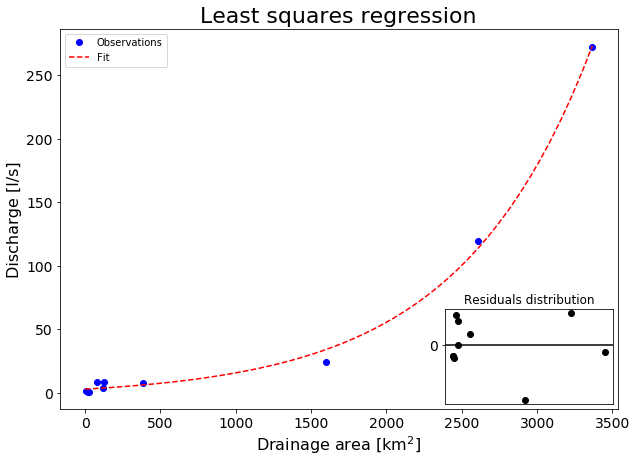

In [3]:
#Generate df of the observations
#DA is in km^2 and Q is in l/s
d={'DA':[82.450, 27.150, 16.275, 117.275, 382.975,
                              1596.280, 127.675, 9.44982, 2609.570, 3367.000], 
                             'Q':[8.662133483, 0.68431375, 0.868684824, 3.60222113,
                              7.995490543, 24.09174135, 8.038100597, 0.935,
                              119.5290555, 271.842]}
df = pd.DataFrame(data=d, dtype=float)

#Observed data
xdata = df['DA']
ydata = df['Q']

#define general powerlaw equation
def func(x, N, a, d):
    return N*np.exp(a*x)+d

x_lin = np.linspace(0, xdata.max(), 50) # 50 evenly spaced digits between 0 and max

# REGRESSION ------------------------------------------------------------------
p0 = [0.005, 0.004, -0.05]                                 # guessed params
w, _ = optimize.curve_fit(func, xdata, ydata, p0=p0)     
print("Estimated Parameters", w)  

# Model
y_model = func(x_lin, *w)

# MODEL OUTPUT -----------------------------------------------------------------
obs_values = ydata
pred_values = []
residuals = []

#calculates the predicted values from the power law fit estimated params
for i in xdata:
    pred_i = (w[0] * (np.exp(w[1]*(i)))+w[2])
    pred_values.append(pred_i)
    
# RESIDUALS -------------------------------------------------------------------    
#calculates the residual for each pair of observations
for obs_v,pred_v in zip(obs_values,pred_values):
    Residual = float(obs_v - pred_v)
    residuals.append(Residual)
    
#calculate RMSE
n_residuals = len(residuals)
sqare_resids = np.square(residuals)

RMSE = np.sqrt((sqare_resids.sum())/(n_residuals-1))
std_residuals = (residuals/RMSE)

# PLOT --------------------------------------------------------------------------
rcParams['figure.titlesize'] = 22
rcParams['axes.titlesize'] = 22
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['figure.subplot.wspace'] = 0.2

fig, ax = plt.subplots(figsize=(10,7))

plt.plot(xdata, ydata, "bo", label="Observations")
plt.plot(x_lin, y_model, "r--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.xlabel('Drainage area [km$^2$]')
plt.ylabel('Discharge [l/s]')

axins = inset_axes(ax, width="30%", height="25%", loc=4)
axins.plot(xdata, std_residuals, linestyle='', marker='o', color='k')
axins.axhline(color='k')
axins.set_xticks([])
axins.set_yticks([0])
axins.set_title(label='Residuals distribution', fontsize='12')

#plt.savefig(fname='LeastSquaresRegression', format='png')
plt.show()

## PART II
**Predicting the discharge** in channels where drainage area can be measured, but discharge cannot:

In [4]:
#df with all measured DAs
WSD = pd.read_csv('DA-QCalc.csv') 
DA = WSD['DA m^2']/1000 #n=58

In [5]:
w=w.astype('float128')

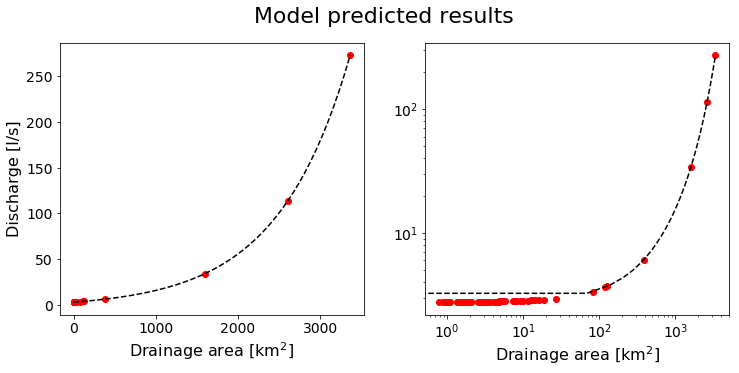

In [16]:
pred_Q = []

#calculates the predicted values from the power law fit estimated params
for j in DA:
    pred_j = (w[0] * (np.exp(w[1]*(j)))+w[2])
    pred_Q.append(pred_j)
    
#plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(DA, pred_Q, marker='o', color='r', linestyle='')
ax1.plot(x_lin, y_model, "k--", label="Fit")
ax1.set_xlabel('Drainage area [km$^2$]')
ax1.set_ylabel('Discharge [l/s]')

ax2.loglog(DA, pred_Q, linestyle='', marker='o', color='r')
ax2.loglog(x_lin, y_model, "k--", label="Fit")
ax2.set_xlabel('Drainage area [km$^2$]')

fig.suptitle('Model predicted results')

plt.savefig(fname='LSR_ModelPredictions', format='png')
plt.show()

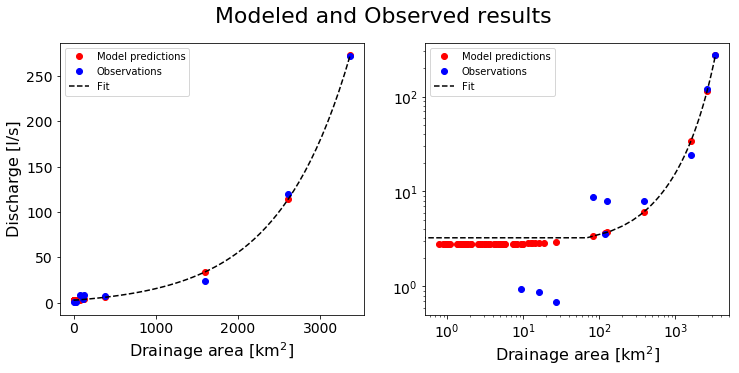

In [17]:
pred_Q = []

#calculates the predicted values from the power law fit estimated params
for j in DA:
    pred_j = (w[0] * (np.exp(w[1]*(j)))+w[2])
    pred_Q.append(pred_j)
    
#plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(DA, pred_Q, marker='o', color='r', linestyle='', label='Model predictions')
ax1.plot(df['DA'], df['Q'], marker='o', color='b', linestyle='', label='Observations')
ax1.plot(x_lin, y_model, "k--", label="Fit")
ax1.set_xlabel('Drainage area [km$^2$]')
ax1.set_ylabel('Discharge [l/s]')
ax1.legend(loc="upper left")

ax2.loglog(DA, pred_Q, linestyle='', marker='o', color='r', label='Model predictions')
ax2.loglog(df['DA'], df['Q'], marker='o', color='b', linestyle='', label='Observations')
ax2.loglog(x_lin, y_model, "k--", label="Fit")
ax2.set_xlabel('Drainage area [km$^2$]')
ax2.legend(loc="upper left")

fig.suptitle('Modeled and Observed results')

plt.savefig(fname='LSR_ModelPredictions', format='png')
plt.show()

In [15]:
pred_Q = np.array(pred_Q)
lsr_df = pd.DataFrame(columns=['Drainage area [km$^2$]','Modeled Q [l/s]',
                               'Modeled Q [cm$^3$/s]','Observed Q [l/s]'])
lsr_df['Drainage area [km$^2$]']=DA
lsr_df['Modeled Q [l/s]']=pred_Q
lsr_df['Modeled Q [cm$^3$/s]']=pred_Q*1000
lsr_df['Observed Q [l/s]']=df['Q']
lsr_df

,Drainage area [km$^2$],Modeled Q [l/s],Modeled Q [cm$^3$/s],Observed Q [l/s]
0,82.45000,3.360216,3360.216338,8.662133
1,27.15000,2.953842,2953.841994,0.684314
2,16.27500,2.876879,2876.878864,0.868685
3,117.27500,3.629507,3629.506620,3.602221
4,382.97500,6.074413,6074.412565,7.995491
5,1596.28000,33.853166,33853.165719,24.091741
6,127.67500,3.712008,3712.008310,8.038101
7,9.44982,2.829059,2829.058646,0.935000
8,2609.57000,113.865031,113865.030602,119.529055
9,3367.00000,273.094621,273094.621240,271.842000


## PART III
Adding in the **cosmo erosion rates**:

- get the erosion data from the cove paper, ic above the gage, sab above the kp

- get the relevant drainage area data

- a range of predicted discharges based on the lsr and lnr models

*Calculate a relationship between erosion rate and baseflow discharge*